<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/penguin-species-clustering/blob/main/Dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import umap

In [2]:
df = pd.read_csv('/content/penguins.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
droped_data = df.dropna()

In [5]:
droped_data = droped_data.drop(droped_data[droped_data['sex']=='.'].index)

In [6]:
droped_data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [7]:
ohe = OneHotEncoder()
ohe_sex = ohe.fit_transform(droped_data[['sex']])
ohe_sex = pd.DataFrame(ohe_sex.toarray(), columns=ohe.get_feature_names_out(['sex']))

In [8]:
ohe_sex

,sex_FEMALE,sex_MALE
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
329,1.0,0.0
330,1.0,0.0
331,0.0,1.0
332,1.0,0.0


In [9]:
scaled_data = pd.concat([droped_data.reset_index(drop=True), ohe_sex.reset_index(drop=True)], axis=1)

In [10]:
scaled_data=scaled_data.drop(columns=['sex'])
scaled_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,0.0,1.0


In [11]:
print(droped_data.shape)
print(ohe_sex.shape)
print(droped_data.index.equals(ohe_sex.index))
print(droped_data.index.difference(ohe_sex.index))
print(ohe_sex.index.difference(droped_data.index))


(334, 5)
(334, 2)
False
Index([334, 335, 337, 338, 340, 341, 342, 343], dtype='int64')
Index([3, 8, 10, 11, 47, 246, 286, 324], dtype='int64')


In [12]:
sc = StandardScaler()
scaled_data = sc.fit_transform(scaled_data)

In [13]:
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_data)

In [14]:
pca_data

array([[-6.13627456e-01,  1.64735996e+00],
       [ 1.69143784e+00,  1.37785583e-01],
       [ 1.89226372e+00,  6.27740457e-01],
       [ 1.98236301e+00,  1.22526723e+00],
       [-6.66712674e-01,  2.37277974e+00],
       [ 1.80808585e+00,  4.27321982e-01],
       [-1.15056140e+00,  1.40727113e+00],
       [-2.35842786e+00,  2.49917037e+00],
       [ 1.88372231e+00,  4.56364033e-01],
       [-7.23965474e-01,  2.54623258e+00],
       [-6.68894259e-01,  2.37712342e+00],
       [ 1.93085709e+00,  5.45414461e-01],
       [ 1.85414793e+00,  9.77247091e-01],
       [-1.34490006e+00,  1.67214120e+00],
       [ 2.25523578e+00,  1.14037648e+00],
       [-1.47268053e+00,  1.89019788e+00],
       [ 1.98216436e+00,  8.17607681e-01],
       [-4.35624589e-01,  1.83636486e+00],
       [ 1.86155193e+00,  1.03487294e+00],
       [-6.27417990e-01,  1.37725802e+00],
       [-5.48022501e-01,  1.10315943e+00],
       [ 1.91863516e+00,  9.69901442e-01],
       [-6.11081265e-01,  1.62635035e+00],
       [ 1.

In [15]:
data = pd.DataFrame(pca_data)
data.head()

,0,1
0,-0.613627,1.647360
1,1.691438,0.137786
2,1.892264,0.627740
3,1.982363,1.225267
4,-0.666713,2.372780


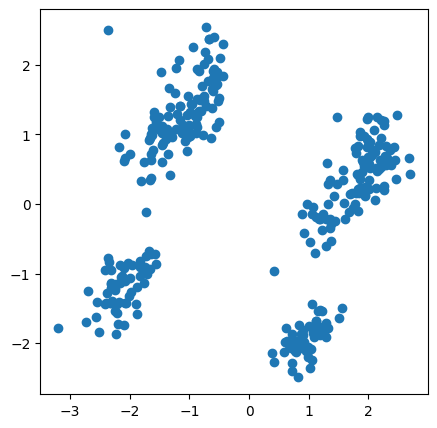

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(data[0], data[1])
plt.show()

In [17]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
tnse_data = pd.DataFrame(tsne_data)

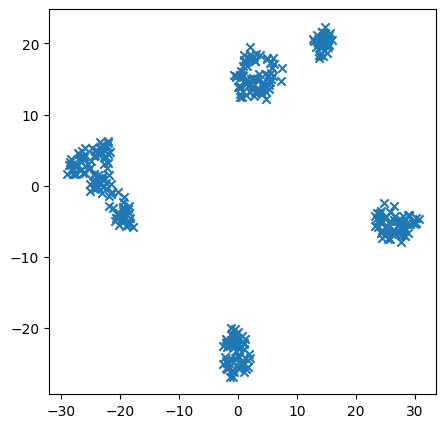

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(tnse_data[0], tnse_data[1], marker='x')
plt.show()

In [19]:
tsne_ac = AgglomerativeClustering(n_clusters=4, linkage='ward')
predicted_tsne = tsne_ac.fit(tnse_data)

In [20]:
print(silhouette_score(tnse_data, tsne_ac.labels_))

0.8269681


In [21]:
ac = AgglomerativeClustering(n_clusters=4, linkage='ward')
predicted = ac.fit(data)

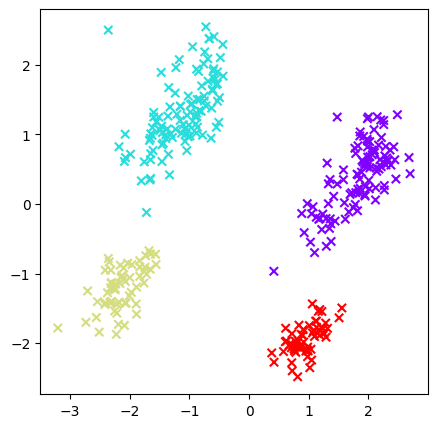

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(data[0], data[1], c=ac.labels_, cmap='rainbow', marker='x')
plt.show()

In [23]:
print(silhouette_score(data, ac.labels_))

0.7156803143242229


In [24]:
dbs = DBSCAN(min_samples=6, eps=0.5)
dbs.fit(data)

DBSCAN(min_samples=6)

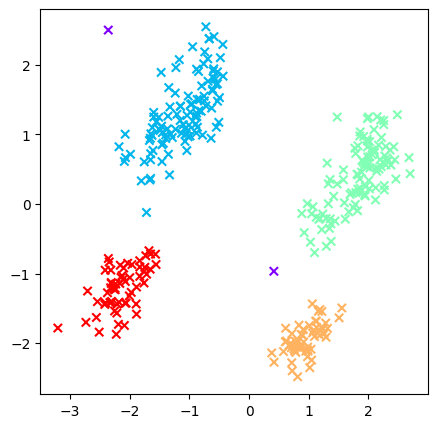

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(data[0], data[1], c=dbs.labels_, cmap='rainbow', marker='x')
plt.show()

In [26]:
ump = umap.UMAP(n_components=2, random_state=42)
embedding = ump.fit_transform(scaled_data)
embedding = pd.DataFrame(embedding)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


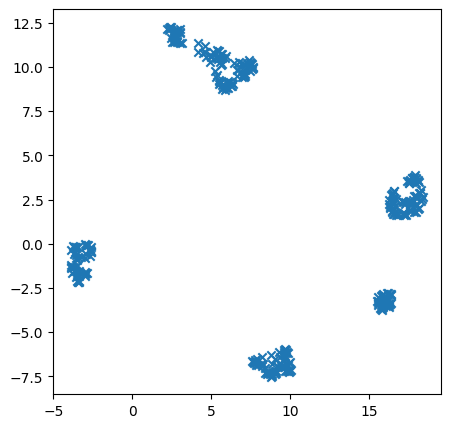

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(embedding[0], embedding[1], marker='x')
plt.show()

In [28]:
ac_ump = AgglomerativeClustering(n_clusters=4, linkage='ward')
predicted_ump = ac_ump.fit(embedding)
print(ac_ump.labels_)

[0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 2 3 2 3 3 2 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 3 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 3
 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 3 2 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2
 3]


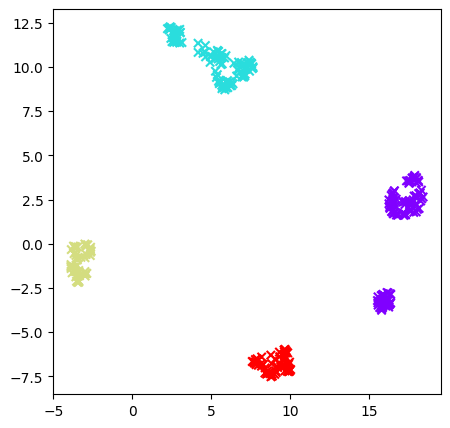

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(embedding[0], embedding[1], c=ac_ump.labels_, cmap='rainbow', marker='x')
plt.show()

In [30]:
silhouette_score(embedding, ac_ump.labels_)

np.float32(0.81110746)

In [31]:
new_row = pd.DataFrame([[5,2.5]])
predict_data = pd.concat([embedding, new_row], axis=0)
predict_data.shape

(335, 2)

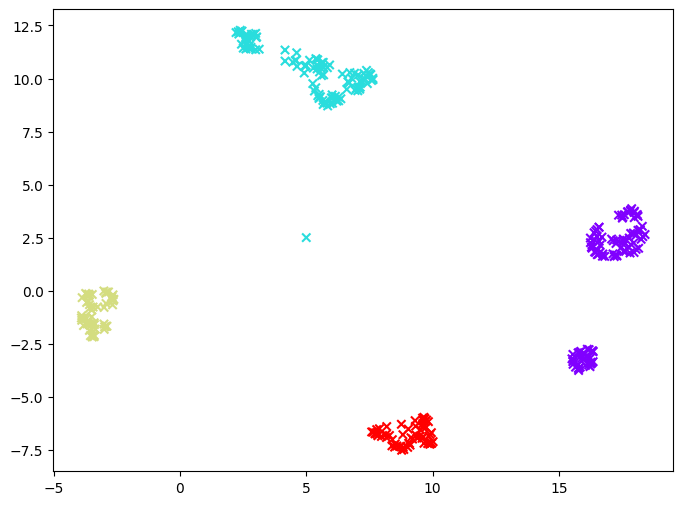

In [32]:
predicted = ac_ump.fit_predict(predict_data)
plt.figure(figsize=(8,6))
plt.scatter(predict_data[0], predict_data[1], c=ac_ump.labels_, cmap="rainbow", marker='x')
plt.show()

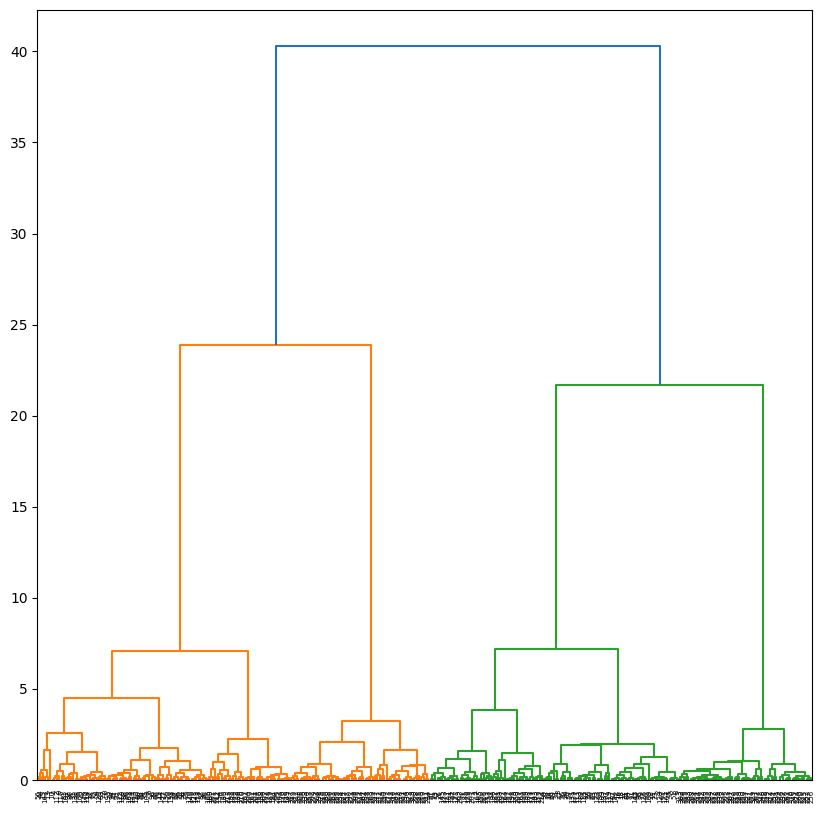

In [39]:
linked = linkage(data, method='ward')
plt.figure(figsize=(10,10))
dendrogram(linked, orientation='top', distance_sort='descending',show_leaf_counts=True)
plt.show()

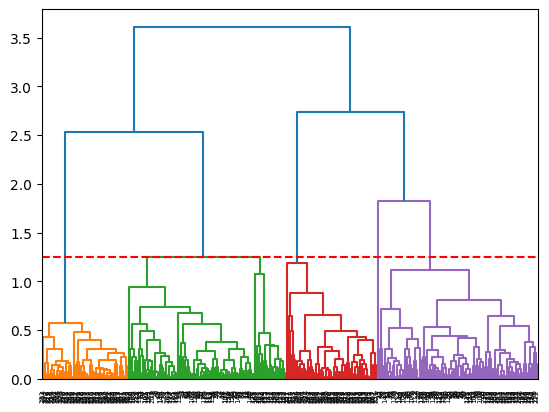

In [46]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(data, method='average')
plt.figure()
hierarchy.dendrogram(Z)
plt.axhline(y=  1.25, color='r', linestyle='--')  # horizontal cut line
plt.show()